In [1]:
import pandas as pd
import numpy as np

In [3]:
demand = pd.read_csv('demand/demand_8_21_maxshelter_1.csv')

In [4]:
zone_centroid = pd.read_csv('geometry/jacksonville/block_groups/metro_centroid/jack_cbgs_centroid.txt')

In [5]:
shelter_centroid = pd.read_csv('geometry/jacksonville/shelters/duval_county/shelters_duval_cnty.csv')

In [6]:
zone_centroid['GEOID_merged']=zone_centroid.apply(lambda row:(str(row['GEOID'])+str(row['GEOID10'])).strip(), axis = 1)

In [7]:
zone_centroid = zone_centroid[['FID','GEOID_merged']]

In [8]:
zone_centroid['FID']= zone_centroid['FID']+1

In [9]:
shelter_centroid = shelter_centroid[['Id', 'GeoID']]

In [10]:
demand['Location'] = demand['Location'].astype('str')

In [7]:
# zone_centroid.to_csv('zone_loopup_table.csv', index = False
#                     )

In [11]:
shelter_centroid['FID'] = -shelter_centroid['Id']
shelter_centroid['GEOID_merged'] = shelter_centroid['GeoID']
shelter_centroid = shelter_centroid[['FID','GEOID_merged']]

In [12]:
zone_centroid = zone_centroid.append(shelter_centroid)

In [13]:
merge_data = pd.merge(demand, zone_centroid, left_on='Location', right_on = 'GEOID_merged')

In [14]:
merge_data = merge_data[['ID','FID','Departure']].rename({'Departure':'Duration'}, axis = 1)

In [15]:
merge_data

,ID,FID,Duration
0,1.0,281,34
1,2.0,281,41
2,3.0,281,50
3,4.0,281,55
4,4.1,281,55
...,...,...,...
949243,618230.0,495,32
949244,618231.0,495,36
949245,618235.0,495,31
949246,618236.0,495,33


In [16]:
merge_data = merge_data.sort_values(['ID','Duration'], ascending = [True,False]).reset_index()

In [17]:
merge_data['ID'] = (merge_data.index//2)+1

In [18]:
merge_data['ID']=merge_data['ID'].astype('int')

In [19]:
merge_data.head(10)

,index,ID,FID,Duration
0,0,1,281,34
1,1288,1,731,0
2,1,2,281,41
3,45923,2,472,0
4,2,3,281,50
5,45924,3,472,0
6,3,4,281,55
7,1289,4,731,0
8,4,5,281,55
9,1290,5,731,0


In [20]:
merge_data = merge_data.drop('index', axis = 1)

In [21]:
merge_data.to_csv('shen_demand_08212020_reindex.csv',index = False)

Visualize the demand by time tick.

In [38]:
import matplotlib.pyplot as plt

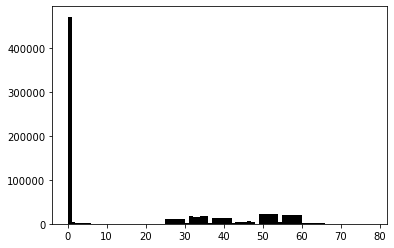

In [40]:
x = plt.hist(merge_data[merge_data['Duration']!=-1]['Duration'],bins=78, color = 'black')

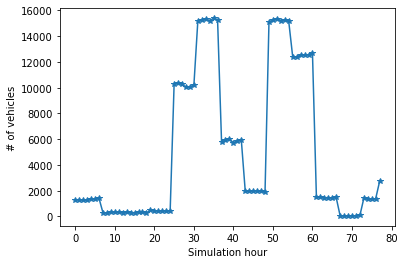

In [7]:
plt.plot(x[1][:78],x[0],'*-')

plt.ylabel("# of vehicles")
plt.xlabel('Simulation hour')
plt.show()

In [36]:
np.cumsum(x[0])[0]

391.0

In [37]:
np.cumsum(x[0])[1]

808.0

(0, 1000)

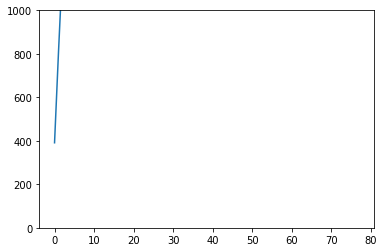

In [35]:
plt.plot(np.cumsum(x[0]))